<a href="https://colab.research.google.com/github/TruptiMGitHub/Deep-Learning/blob/main/DL_MNIST_Digit_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Recognition with CNN**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [141]:
X_train=pd.read_csv('/content/train.csv')
X_test=pd.read_csv('/content/test.csv')

In [142]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [143]:
X_test.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [144]:
# y_train=X_train["label"]
# X_train=X_train.drop("label",axis=1)

y_train=X_train.iloc[:,0]
X_train=X_train.iloc[:,1:]

In [145]:
y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


# Converting 1D array to 28*28 image

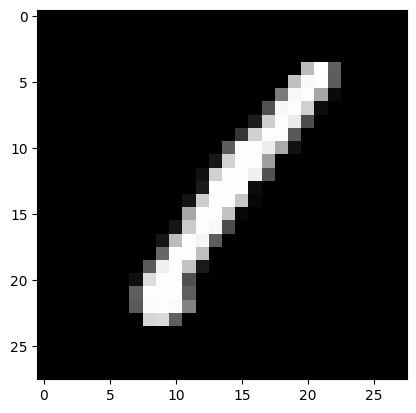

In [146]:
image=np.array(X_train.iloc[0]).reshape(28,28)
plt.imshow(image,cmap='gray')

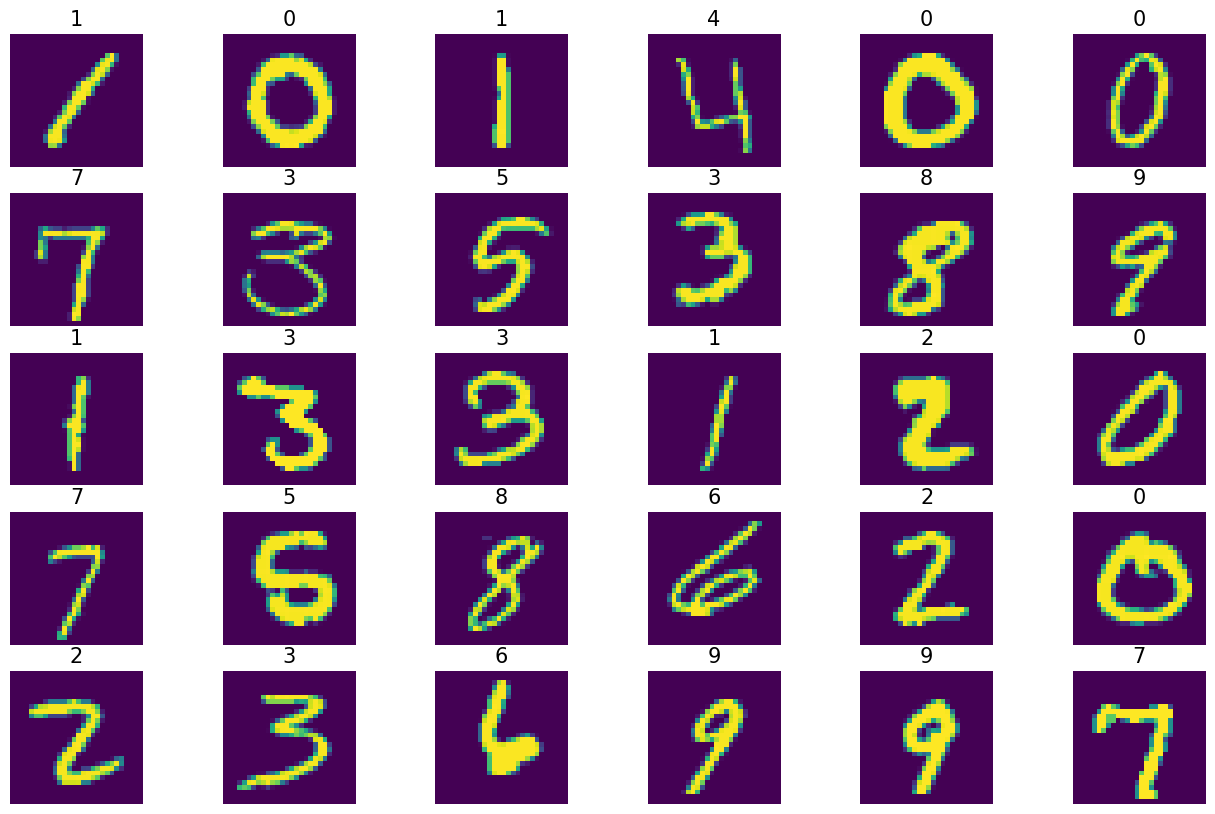

In [147]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(X_train.iloc[i].values.reshape(28,28), cmap='viridis')
    axs[row][col].set_title(str(y_train.iloc[i]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('', fontsize=30)
plt.show()



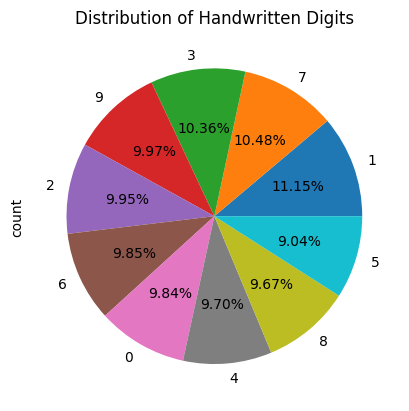

In [148]:
y_train.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

# **Normalizing the data**

In [149]:
X=X_train.values/255
Xt=X_test.values/255

# **Reshape for model Trainig**

In [150]:
X_train=X.reshape(-1,28,28,1)
X_test=Xt.reshape(-1,28,28,1)

# **Lets create a model**

In [151]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [154]:
history0 =model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - accuracy: 0.8144 - loss: 0.5761 - val_accuracy: 0.9787 - val_loss: 0.0648
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.9672 - loss: 0.1100 - val_accuracy: 0.9845 - val_loss: 0.0506
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9781 - loss: 0.0736 - val_accuracy: 0.9877 - val_loss: 0.0409
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9818 - loss: 0.0637 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9854 - loss: 0.0506 - val_accuracy: 0.9880 - val_loss: 0.0410
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9887 - val_loss: 0.0354
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9889 - val_loss: 0.0353
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9891 -

In [155]:
loss,accuracy=model.evaluate(X_train,y_train)
print('The Models accuracy is : ',accuracy)
print('The Models loss is : ',loss)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9965 - loss: 0.0104
The Models accuracy is :  0.9952142834663391
The Models loss is :  0.015777140855789185


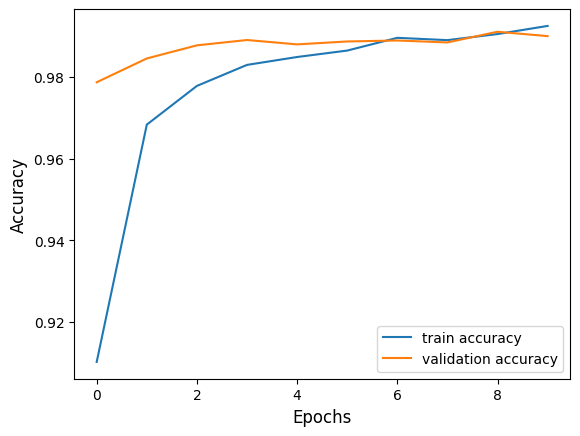

In [156]:
plt.plot(history0.history['accuracy'],label='train accuracy')
plt.plot(history0.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend()
plt.show()

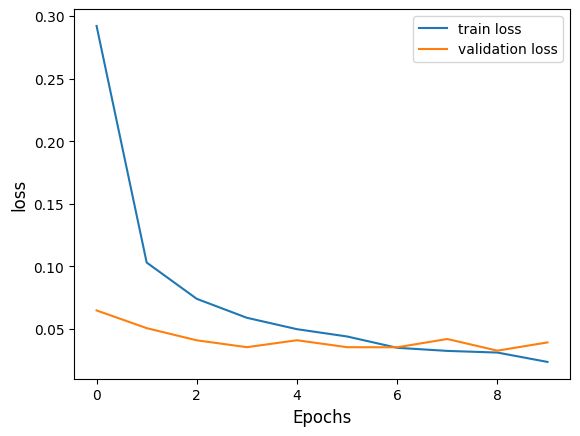

In [157]:
plt.plot(history0.history['loss'],label='train loss')
plt.plot(history0.history['val_loss'],label='validation loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()
plt.show()

# **Try using kerner regularization **

In [158]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),padding='valid',kernel_regularizer=regularizers.l2(0.02),activation='relu',input_shape=(28,28,1)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.02),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
history1=model1.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8042 - loss: 0.8689 - val_accuracy: 0.9587 - val_loss: 0.2362
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.9474 - loss: 0.2629 - val_accuracy: 0.9751 - val_loss: 0.1503
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9581 - loss: 0.2098 - val_accuracy: 0.9757 - val_loss: 0.1433
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9640 - loss: 0.1811 - val_accuracy: 0.9762 - val_loss: 0.1302
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9661 - loss: 0.1692 - val_accuracy: 0.9745 - val_loss: 0.1297
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9693 - loss: 0.1521 - val_accuracy: 0.9794 - val_loss: 0.1124
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9720 - loss: 0.1381 - val_accuracy: 0.9798 - val_loss: 0.1049
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9737 -

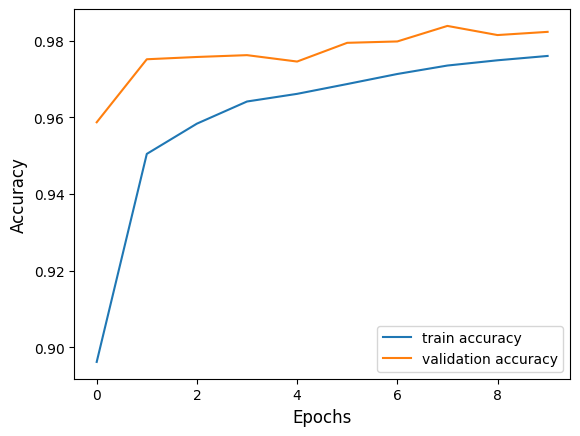

In [160]:
plt.plot(model1.history.history['accuracy'],label='train accuracy')
plt.plot(model1.history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend()
plt.show()

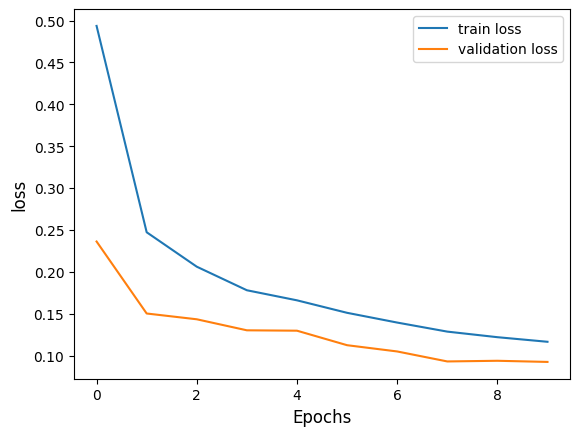

In [161]:
plt.plot(history1.history['loss'],label='train loss')
plt.plot(history1.history['val_loss'],label='validation loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()
plt.show()

# **Using Batch Normalization**

In [162]:
model2=Sequential()
model2.add(Conv2D(32,(3,3),padding='valid',kernel_regularizer=regularizers.l2(0.02),activation='relu',input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.02),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [163]:
history2=model2.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 52ms/step - accuracy: 0.8498 - loss: 1.0535 - val_accuracy: 0.9794 - val_loss: 0.1728
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9558 - loss: 0.2426 - val_accuracy: 0.9821 - val_loss: 0.1317
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 49ms/step - accuracy: 0.9670 - loss: 0.1820 - val_accuracy: 0.9748 - val_loss: 0.1526
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9705 - loss: 0.1594 - val_accuracy: 0.9730 - val_loss: 0.1428
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9754 - loss: 0.1325 - val_accuracy: 0.9837 - val_loss: 0.1025
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.9772 - loss: 0.1241 - val_accuracy: 0.9811 - val_loss: 0.1066
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9777 - loss: 0.1167 - val_accuracy: 0.9857 - val_loss: 0.0893
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.9818 -

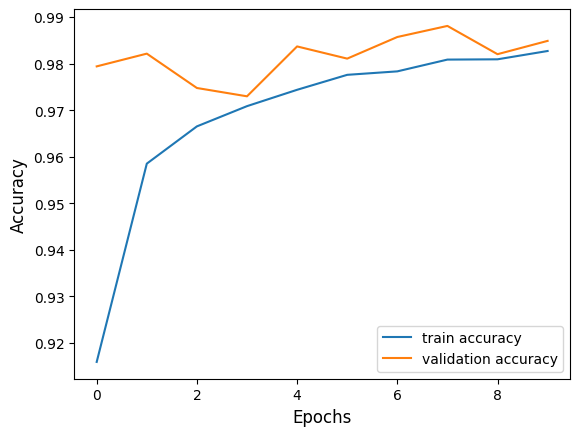

In [164]:
plt.plot(history2.history['accuracy'],label='train accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend()
plt.show()

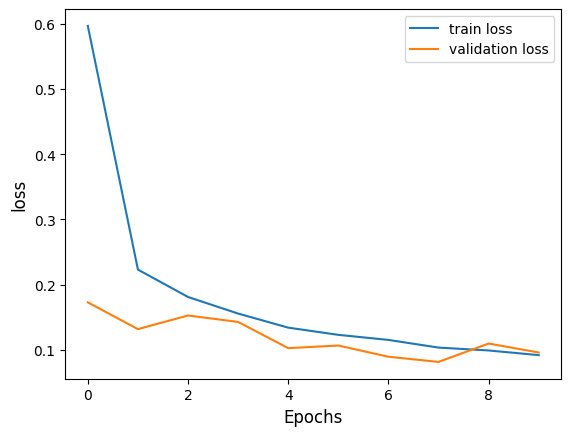

In [165]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()
plt.show()

# **Prediction on test data **

In [166]:
predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


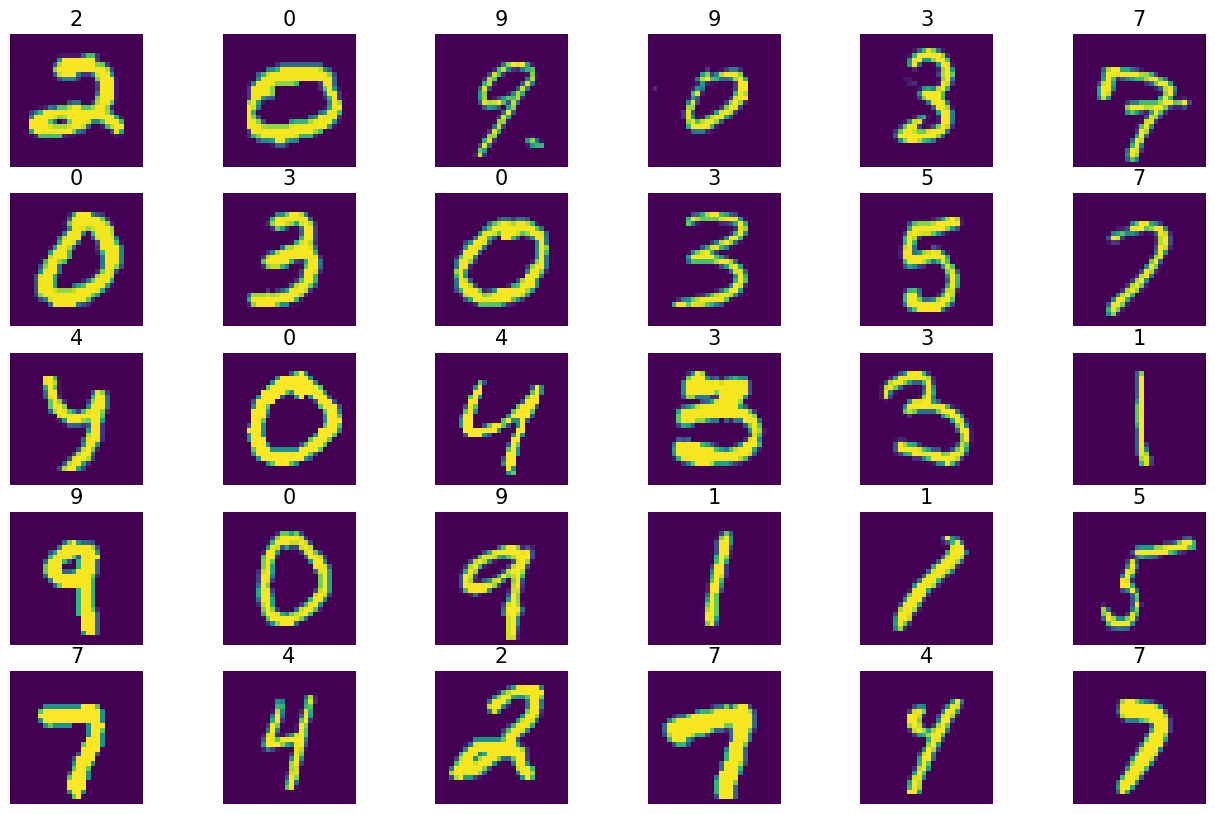

In [170]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(X_test[i].reshape(28, 28), cmap='viridis')
    axs[row][col].set_title(str(predicted_labels[i]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('', fontsize=30)
plt.show()

In [167]:
predictions1=model1.predict(X_test)
predicted_labels1=np.argmax(predictions1,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


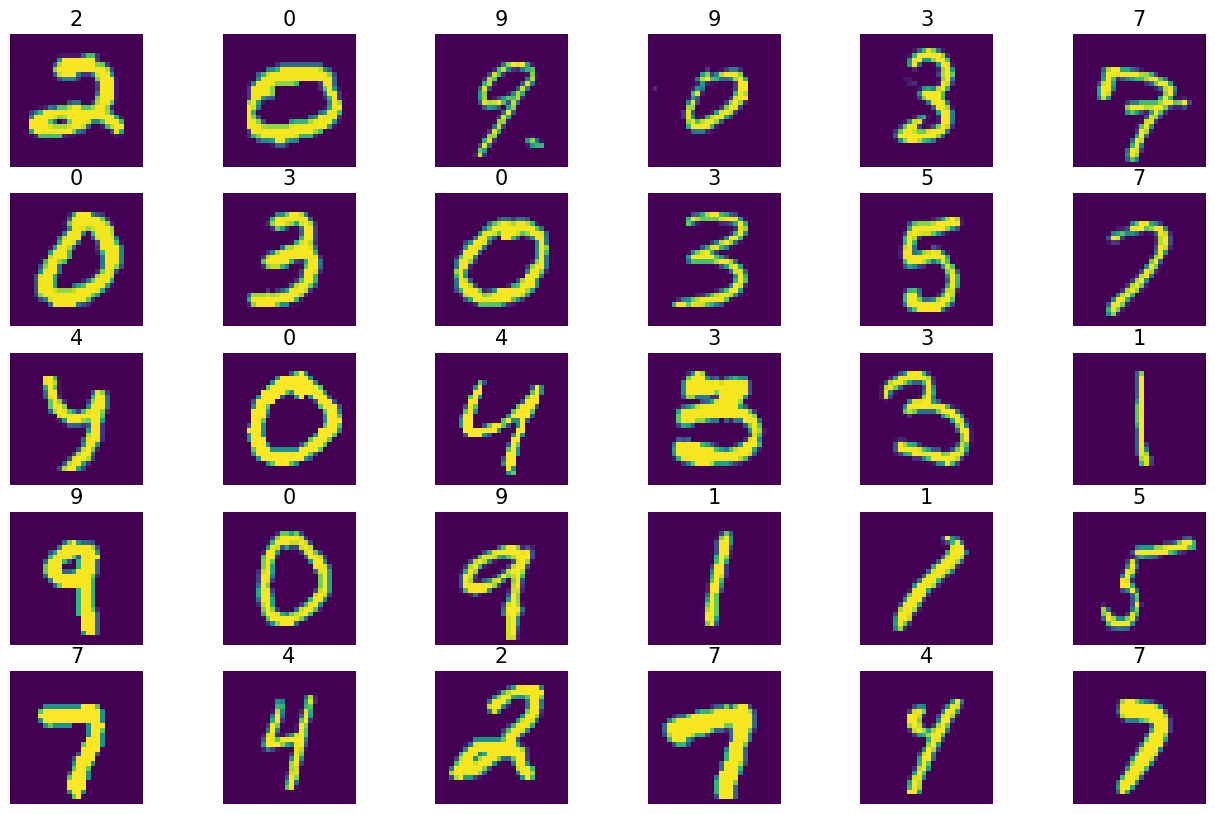

In [172]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(X_test[i].reshape(28, 28), cmap='viridis')
    axs[row][col].set_title(str(predicted_labels1[i]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('', fontsize=30)
plt.show()

In [137]:
predictions2=model2.predict(X_test)
predicted_labels2=np.argmax(predictions2,axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step


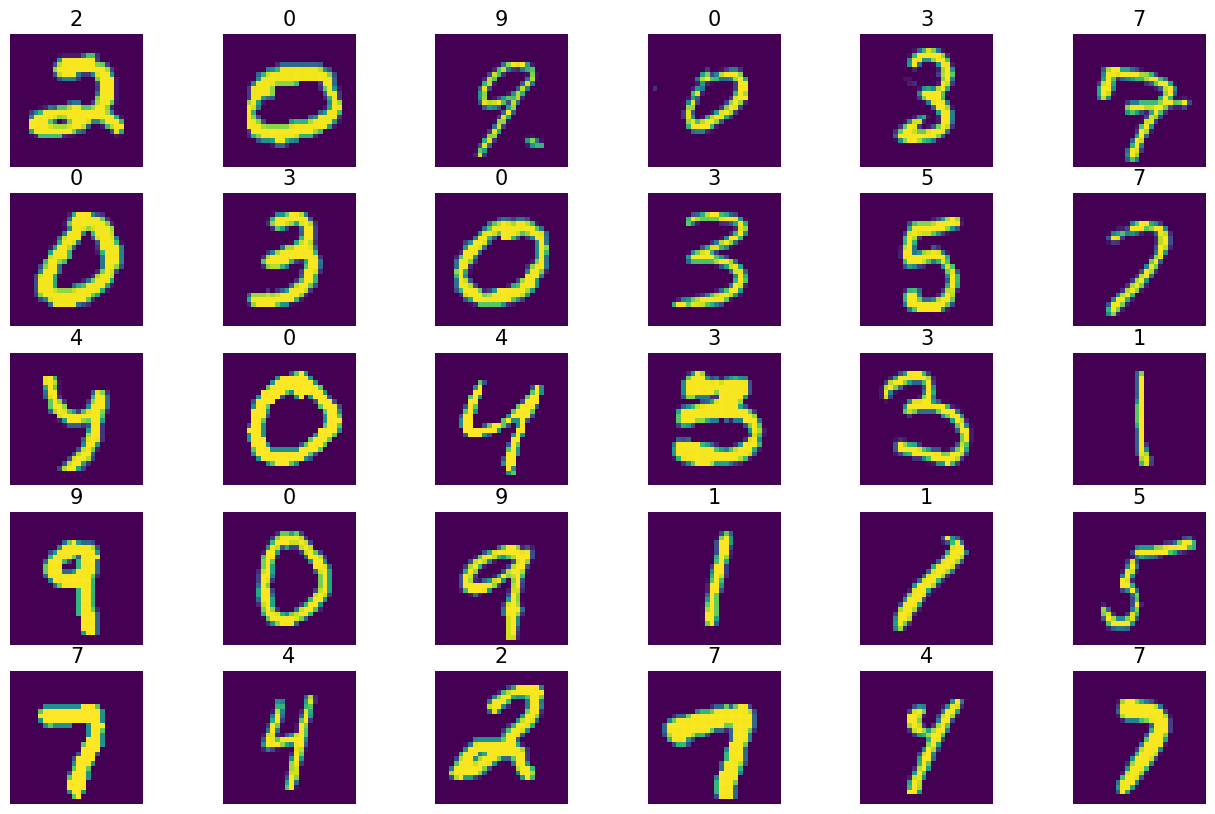

In [173]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(X_test[i].reshape(28, 28), cmap='viridis')
    axs[row][col].set_title(str(predicted_labels2[i]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('', fontsize=30)
plt.show()